In [14]:
import torch
from pretrain.YOLO_Feature import YOLO_Feature

In [15]:
yolo_feature = YOLO_Feature()
pretrain_dict = torch.load('weights/YOLO_Feature_120.pth', map_location='cpu')

In [16]:
yolo_feature.load_state_dict(pretrain_dict['model'])


<All keys matched successfully>

In [17]:
from data_process.COCO_DataSet import *

train_dataSet = coco_classify_dataset(imgs_path='../data/coco2017/Train/Imgs',txts_path='../data/coco2017/Train/Labels', is_train=True, edge_threshold=200)

In [18]:
train_iter = torch.utils.data.DataLoader(train_dataSet, batch_size=1, shuffle=True, num_workers=1)


tensor([[ 5.2132,  0.0838,  0.8987,  0.0888, -0.9339, -0.4376,  0.2144,  0.3663,
          0.5588, -0.7852, -0.4614, -1.8304, -0.9781,  1.2053,  0.5232,  0.5145,
          1.2831,  0.1593, -0.5205, -0.1168, -0.0093, -1.0023, -0.6645, -0.7234,
          0.2580,  0.8296,  0.2537, -0.0442,  0.8632, -0.8986, -0.1715, -0.5420,
         -0.1129, -0.5370, -0.1952, -0.3565, -0.1939,  0.4057, -0.2950,  0.2324,
         -0.0961, -0.1156, -0.8912, -0.7204, -0.8502,  0.0656,  0.0618, -0.4315,
         -0.5774, -0.9610, -1.2063, -0.7329, -0.6309, -0.8447, -0.4111,  0.4553,
          2.2208,  1.2906,  0.4038,  1.7250,  1.8278, -0.1195, -0.0318, -0.0746,
         -1.0174, -0.8203, -0.8775, -0.9593, -1.0442,  0.2386, -1.0739, -0.2246,
          0.1587,  0.5955, -0.6663, -0.0236, -0.7828,  0.2826, -0.5243, -0.6472]])


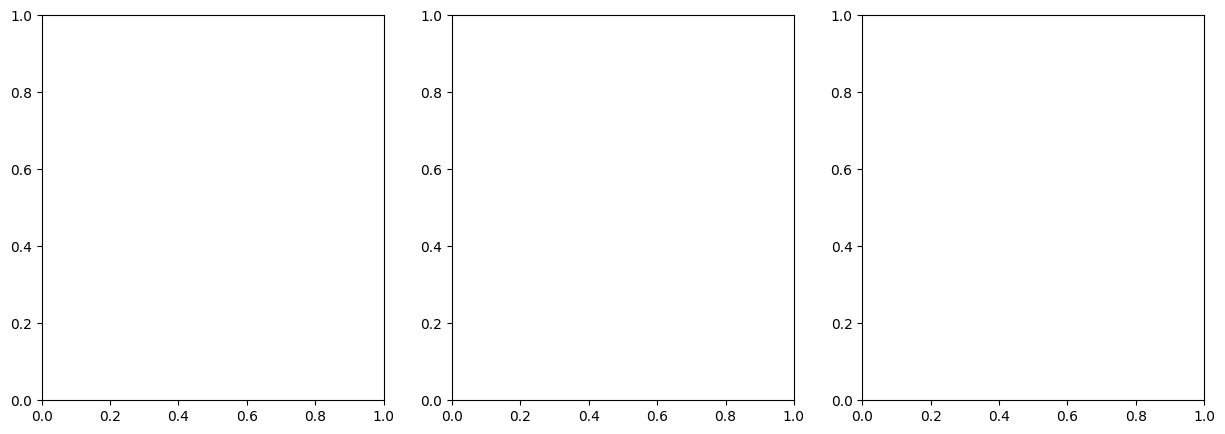

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as display

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

def show_img(img, ax, pred, lable):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'pred: {pred}, label: {lable}')

for i, (imgs, labels) in enumerate(train_iter):
    with torch.no_grad():
        y_head = yolo_feature(imgs)
    print(y_head)
    #show_img(imgs[0].numpy().transpose(1, 2, 0), axes[i], pred[0], labels[0])
    break

